<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/aivill0915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip mnist_numbers_direct.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: mnist_numbers/test/0/478.jpg  
  inflating: mnist_numbers/test/0/479.jpg  
  inflating: mnist_numbers/test/0/480.jpg  
  inflating: mnist_numbers/test/0/481.jpg  
  inflating: mnist_numbers/test/0/482.jpg  
  inflating: mnist_numbers/test/0/483.jpg  
  inflating: mnist_numbers/test/0/484.jpg  
  inflating: mnist_numbers/test/0/485.jpg  
  inflating: mnist_numbers/test/0/486.jpg  
  inflating: mnist_numbers/test/0/487.jpg  
  inflating: mnist_numbers/test/0/488.jpg  
  inflating: mnist_numbers/test/0/489.jpg  
  inflating: mnist_numbers/test/0/490.jpg  
  inflating: mnist_numbers/test/0/491.jpg  
  inflating: mnist_numbers/test/0/492.jpg  
  inflating: mnist_numbers/test/0/493.jpg  
  inflating: mnist_numbers/test/0/494.jpg  
  inflating: mnist_numbers/test/0/495.jpg  
  inflating: mnist_numbers/test/0/496.jpg  
  inflating: mnist_numbers/test/0/497.jpg  
  inflating: mnist_numbers/test/0/498.jpg  
  inflating: mnist_numbers/test/0/499.jp

In [6]:
# prepare dataset
import os, shutil, natsort, re
import numpy as np
import matplotlib.pyplot as plt
# 데이터경로
base_dir= '/content/mnist_numbers'
train_dir= '/content/mnist_numbers/train'
validation_dir= '/content/mnist_numbers/validation'
test_dir= '/content/mnist_numbers/test'
# 폴더명으로파일명에라벨링
for folder_name in ("train","validation","test"):
    for folder_subname in ("0","1","2","3","4","5","6","7","8","9"):
        folder_path= os.path.join(base_dir, folder_name)
        folder_subpath= os.path.join(folder_path, folder_subname)
        fnames= natsort.natsorted(os.listdir(folder_subpath))
        for fname in fnames:
            src= os.path.join(folder_subpath, fname)
            dst= os.path.join(folder_subpath, folder_subname+ '.' + fname)
            p=re.compile('[0-9]+.[0-9]+.jpg')
            if p.search(src) == None: # 패턴발견시(이미바뀐파일)생략
                os.rename(src, dst)
# match전체문자열에서시작부터패턴과일치하는첫번째문자열을찾아매치객체로반환
# search전체문자열에서패턴과일치하는첫번째문자열을찾아매치객체로반환
# findall전체문자열에서패턴과일치하는모든문자열을찾아리스트로반환
# finditer전체문자열에서패턴과일치하는모든문자열을찾아반복가능객체로반환

In [7]:
# create neural network
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1))) # 필터(3,3)사이즈32개/ 입력1채널150 x 150 이미지
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax')) # 숫자구분
model.summary()
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])
# Data Preprocessing
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255)
validation_datagen= ImageDataGenerator(rescale=1./255)
epochs = 10
batch_size= 20
target_size=(150,150)
# AI데이터지정
train_generator= train_datagen.flow_from_directory(
train_dir,
target_size=target_size,
batch_size=batch_size,
color_mode='grayscale', # 흑백이미지
class_mode='categorical'
)
validation_generator= validation_datagen.flow_from_directory(
validation_dir,
target_size=target_size,
batch_size=batch_size,
color_mode='grayscale', # 흑백이미지
class_mode='categorical'
)
for data_batch, labels_batch in train_generator:
    print ('배치데이터크기:', data_batch.shape)
    print ('배치레이블크기:', labels_batch.shape)
    break
# 배치데이터크기: (20, 150, 150, 1)
# 배치레이블크기: (20, 10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

test information
<class 'keras.src.preprocessing.image.DirectoryIterator'>
219
Epoch 1/10
218/218 [==============================] - 16s 21ms/step - loss: 0.6356 - acc: 0.7962 - val_loss: 0.3604 - val_acc: 0.8867
Epoch 2/10
218/218 [==============================] - 5s 23ms/step - loss: 0.1894 - acc: 0.9396 - val_loss: 0.2004 - val_acc: 0.9367
Epoch 3/10
218/218 [==============================] - 4s 17ms/step - loss: 0.1180 - acc: 0.9637 - val_loss: 0.1120 - val_acc: 0.9633
Epoch 4/10
218/218 [==============================] - 4s 17ms/step - loss: 0.0777 - acc: 0.9770 - val_loss: 0.1468 - val_acc: 0.9500
Epoch 5/10
218/218 [==============================] - 5s 23ms/step - loss: 0.0530 - acc: 0.9860 - val_loss: 0.1386 - val_acc: 0.9500
Epoch 6/10
218/218 [==============================] - 4s 18ms/step - loss: 0.0410 - acc: 0.9851 - val_loss: 0.1242 - val_acc: 0.9767
Epoch 7/10
218/218 [==============================] - 4s 17ms/step - loss: 0.0223 - acc: 0.9913 - val_loss: 0.1884 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


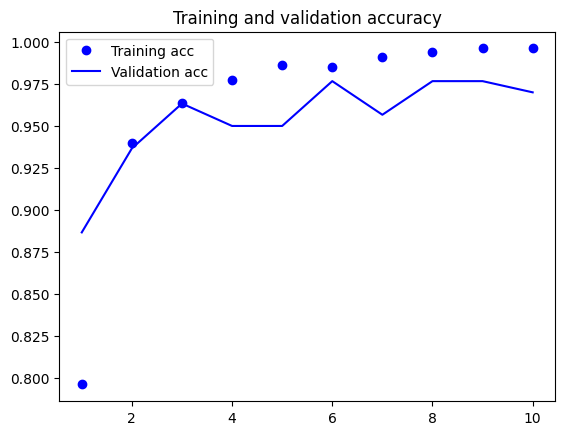

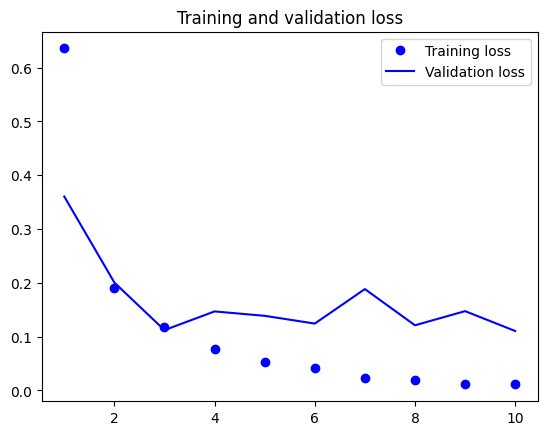

In [8]:
# steps_per_epoch= len(X_train)//batch_size
# validation_steps= len(X_test)//batch_size
steps_per_epoch= 4377//batch_size
validation_steps= 300//batch_size
print('test information')
print(train_generator)
print(type(train_generator))
print(len(train_generator))
'''219'''
'''4,377 -218 x 20 = 17 개남음. 따라서batch_size20개씩218번, 나머지17개1번하면, 총219번만에완료가능'''
# 모델학습
history = model.fit(
train_generator,
steps_per_epoch= steps_per_epoch,
validation_steps= validation_steps,
epochs = epochs,
batch_size= batch_size,
verbose = 1,
validation_data= (validation_generator)
)
# 모델저장
model.save('/content/drive/MyDrive/aivill/mnist_numbers/mnist_numbers_1.h5')
# 시각화
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc= history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()